## Numerical Methods.

### Non-linear equations solution.

### General task is solution non-linear equation with given signature: 

$ f(x) = 0 $

In [0]:
import cmath
import numpy as np
import pandas as pd
from pylab import *
from math import cos, sqrt
from functools import partial
from tqdm import tqdm

%matplotlib inline


In [0]:
class SignError(Exception):
    pass


In [0]:
class Params(dict):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)

In [0]:
class Optimizer:
    
    max_iter = int(10e5)
    
    @staticmethod
    def bisection(epsilon, fun, left_border, right_border):
        middle = (left_border + right_border) / 2
        f_mid = fun(middle)
        f_left = fun(left_border)
        f_right = fun(right_border)
        
        if abs(f_left) < epsilon:
            return left_border
        if abs(f_right) < epsilon:
            return right_border
        
        if f_left * f_right > 0:
            raise SignError("Borders must be different signs")
        
        def left_case():
            return Optimizer.bisection(epsilon, fun, left_border, middle)
        
        def middle_case():
            return middle
        
        def right_case():
            return Optimizer.bisection(epsilon, fun, middle, right_border)
        
        if right_border - left_border < epsilon:
            return middle
        elif f_mid * f_left < 0:
            return left_case()
        elif abs(f_mid) < epsilon:
            return middle_case()
        else:
            return right_case()
        
    @staticmethod
    def bisection_localize(epsilon, fun, left_border, right_border):
        middle = (left_border + right_border) / 2
        f_mid = fun(middle)
        f_left = fun(left_border)
        f_right = fun(right_border)
        
        if abs(f_left) < epsilon:
            return left_border, right_border
        if abs(f_right) < epsilon:
            return right_border, right_border
        
        if f_left * f_right > 0:
            raise SignError("Borders must be different signs")
        
        def left_case():
            return Optimizer.bisection_localize(epsilon, fun, left_border, middle)
        
        def middle_case():
            return left_border, right_border
        
        def right_case():
            return Optimizer.bisection_localize(epsilon, fun, middle, right_border)
        
        if right_border - left_border < epsilon:
            return left_border, right_border
        elif f_mid * f_left < 0:
            return left_case()
        elif abs(f_mid) < epsilon:
            return middle_case()
        else:
            return right_case()
        
    @staticmethod
    def newton(epsilon, fun, fun_derivative, initial_guess):
      
        guess = initial_guess
    
        for i in range(Optimizer.max_iter):
            f_guess = fun(guess)
            f_derivative_guess = fun_derivative(guess)
            
            new_guess = guess - f_guess / f_derivative_guess
            
            error = abs(guess - new_guess)
            
            if error < epsilon:
                return new_guess, Params(iter_num=i, epsilon=epsilon, guess=initial_guess)
            else:
                guess = new_guess
    
    @staticmethod
    def newton_simplified(epsilon, fun, fun_derivative, initial_guess):
        
        guess = initial_guess
        f_derivative_guess = fun_derivative(guess)
        
        for i in range(Optimizer.max_iter):
            f_guess = fun(guess)
            
            new_guess = guess - f_guess / f_derivative_guess
            
            error = abs(guess - new_guess)
            
            if error < epsilon:
                return new_guess, Params(iter_num=i, epsilon=epsilon, guess=initial_guess)
            else:
                guess = new_guess
    
    @staticmethod
    def newton_multiple_roots(epsilon, m, fun, fun_derivative, initial_guess):
        
        def find_m_root(m, _guess):
            
            for i in range(Optimizer.max_iter):
                f_guess = fun(_guess)
                f_derivative_guess = fun_derivative(_guess)
                
                new_guess = _guess - m * f_guess / f_derivative_guess
                
                error = abs(_guess - new_guess)
                
                if error < epsilon:
                    return new_guess, Params(iter_num=i, epsilon=epsilon, guess=initial_guess, m=m)
                else:
                    _guess = new_guess
                    
        return list(map(partial(find_m_root, _guess=initial_guess), range(1, m + 1)))
   


In [0]:
def print_root_with_params(root, params):
  print("Root: x = {} with params {}".format(root, params))

In [0]:
def build_plot(fun, boundaries):
    space = np.linspace(*boundaries, num=10000)
    f_values = np.array(list(map(fun, space)))
    
    plot(space, f_values)
    
    axhline(y=0, color='k')
    axvline(x=0, color='k')
    
    grid(True, which='both')
    
    idx = np.argwhere(np.diff(np.sign(f_values - np.zeros(len(f_values))))).flatten()
    plt.plot(space[idx], f_values[idx], 'ro')


### Task 1

For given equations 

$  f(x)  = cos(x) ^ 2 - (\frac {1} {\sqrt 2} + \frac 1 4)  cos(x) + \frac 1 {4  \sqrt 2} = 0 $

$  g(x)  = cos(x) ^ 2 - \frac {2} {\sqrt 2}  cos(x) + \frac 1 2 = 0 $

find all roots with  $ \varepsilon = 10 ^ {(-10)} $ using bisection method

In [0]:
class Task1:
    
    @staticmethod
    def first_function(x):
        return (cos(x)) ** 2 - (1 / sqrt(2) + 1 / 4) * cos(x) + 1 / (4 * sqrt(2))
    
    @staticmethod
    def second_function(x):
        return cos(x) ** 2 - (2 / sqrt(2)) * cos(x) + 1 / 2
    
    @staticmethod
    def second_function_derivative(x):
        return (1 / 4 + 1 / sqrt(2)) * sin(x) - sin(2 * x)
    
    boundaries = (0, 1.5)


#### Find roots of first function

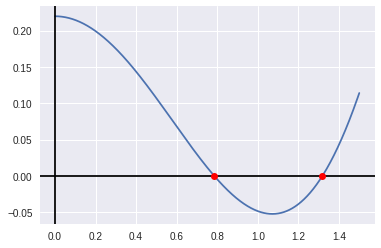

In [0]:
build_plot(Task1.first_function, Task1.boundaries)


In [0]:
print("First root: x =", Optimizer.bisection(10e-10, Task1.first_function, 0, 1))

First root: x = 0.7853981629014015


In [0]:
print("Second root: x =", Optimizer.bisection(10e-10, Task1.first_function, 1, 1.5))

Second root: x = 1.3181160725653172


$ x_1 \approx \ 0.7845, x_2 \approx 1.3181 $

#### Finding roots of second function

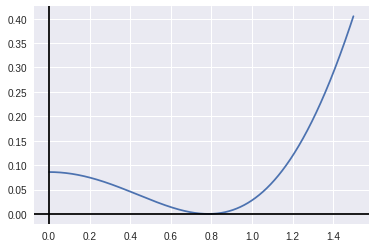

In [0]:
build_plot(Task1.second_function, Task1.boundaries)


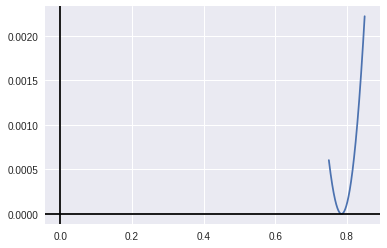

In [0]:
build_plot(Task1.second_function, (0.75, 0.85))

In [0]:
try:
  Optimizer.bisection(10e-10, Task1.second_function, 0.7, 0.786)
except Exception as e:
  print(e)

Borders must be different signs


From the plot we can observe that our root is in local minimum os given function. 

As the result, bisection method will not converge.

However, we can find root with different methods.

In [0]:
print("Root: x =", Optimizer.newton(10e-10, Task1.second_function, Task1.second_function_derivative, 0.5)[0])

Root: x = 0.785372739044352


$ x\approx 0.7854 $

### Task 2

Localize roots of given equation: $ f(x)  = e ^ x - 3 \sqrt x = 0$

Find roots with precision $ \varepsilon = 10 ^ {(-5)} $ and $ \varepsilon = 10 ^ {(-12)} $ using Newton's method and Simplified Newton's method.

Compare convergence speed for each $ \varepsilon $


In [0]:
class Task2:
    @staticmethod
    def function(x):
        return exp(x) - 3 * sqrt(x)
    
    @staticmethod
    def function_derivative(x):
        return exp(x) - 3 / (2 * sqrt(x))


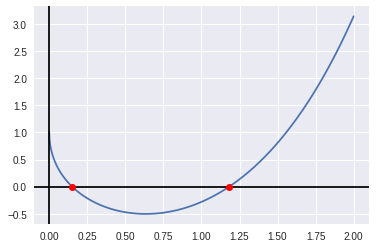

In [0]:
build_plot(Task2.function, (0, 2))


In [0]:
print_root_with_params(*Optimizer.newton(10e-5, Task2.function, Task2.function_derivative, 1))

%timeit Optimizer.newton(10e-5, Task2.function, Task2.function_derivative, 1)

Root: x = 1.1823747443517838 with params {'iter_num': 3, 'epsilon': 0.0001, 'guess': 1}
The slowest run took 6.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.9 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton(10e-5, Task2.function, Task2.function_derivative, 0.1))

%timeit Optimizer.newton(10e-5, Task2.function, Task2.function_derivative, 0.1)

Root: x = 0.1499775897238302 with params {'iter_num': 3, 'epsilon': 0.0001, 'guess': 0.1}
The slowest run took 6.00 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.2 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton(10e-12, Task2.function, Task2.function_derivative, 1))

%timeit Optimizer.newton(10e-12, Task2.function, Task2.function_derivative, 1)

Root: x = 1.1823747443240389 with params {'iter_num': 5, 'epsilon': 1e-11, 'guess': 1}
The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton(10e-12, Task2.function, Task2.function_derivative, 0.1))

%timeit Optimizer.newton(10e-12, Task2.function, Task2.function_derivative, 0.1)

Root: x = 0.1499775897238347 with params {'iter_num': 4, 'epsilon': 1e-11, 'guess': 0.1}
10000 loops, best of 3: 20.9 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton_simplified(10e-5, Task2.function, Task2.function_derivative, 1))

%timeit Optimizer.newton_simplified(10e-5, Task2.function, Task2.function_derivative, 1)

Root: x = 1.182355013560296 with params {'iter_num': 13, 'epsilon': 0.0001, 'guess': 1}
10000 loops, best of 3: 32.9 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton_simplified(10e-5, Task2.function, Task2.function_derivative, 0.1))

%timeit Optimizer.newton_simplified(10e-5, Task2.function, Task2.function_derivative, 0.1)

Root: x = 0.14995031058889846 with params {'iter_num': 4, 'epsilon': 0.0001, 'guess': 0.1}
The slowest run took 8.89 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.8 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton_simplified(10e-12, Task2.function, Task2.function_derivative, 1))

%timeit Optimizer.newton_simplified(10e-12, Task2.function, Task2.function_derivative, 1)

Root: x = 1.1823747443212327 with params {'iter_num': 39, 'epsilon': 1e-11, 'guess': 1}
10000 loops, best of 3: 85.6 µs per loop


In [0]:
print_root_with_params(*Optimizer.newton_simplified(10e-12, Task2.function, Task2.function_derivative, 0.1))

%timeit Optimizer.newton_simplified(10e-12, Task2.function, Task2.function_derivative, 0.1)

Root: x = 0.14997758972179892 with params {'iter_num': 16, 'epsilon': 1e-11, 'guess': 0.1}
The slowest run took 12.92 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 38.8 µs per loop


We can observe that:
  1. Methods with lower precision converge faster.
  2. Simplified Newton's method take more steps to converge.
  3. Simplified Newton's method generally works faster when precision is low

$ x_1 \approx 0.1500, x_2 \approx 1.1824 $

###  Task 3

#### First part
1. Localize roots of equation $ f(x) = 3x^3 - 35x^2 + 125x - 125 = 0$
2. Find roots with $ \varepsilon = 10^{-7} $ using Newton's method.
3. Find multiple root using modified Newton's method with nultiplicity in range $ m =1, 2, 3 $. Does it converge with all initial guesses?

In [0]:
class Task3: 
    @staticmethod
    def function(x):
        return 3 * x ** 3 - 35 * x ** 2 + 125 * x - 125
    
    @staticmethod
    def function_derivative(x):
        return 9 * x ** 2 - 70 * x + 125
    
    @staticmethod
    def function_wth_delta(x):
        return Task3.function(x) + 10e-8


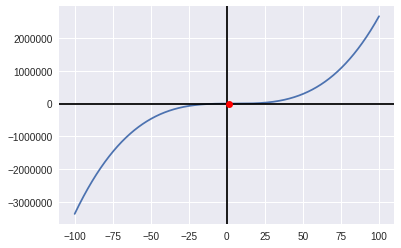

In [0]:
build_plot(Task3.function, (-100, 100))

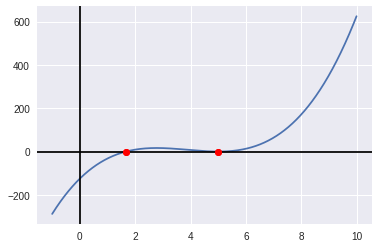

In [0]:
build_plot(Task3.function, (-1, 10))

##### First root

In [0]:
loc_1 = Optimizer.bisection_localize(10e-2, Task3.function, 1, 3)

print(loc_1)

(1.625, 1.6875)


In [0]:
print_root_with_params(*Optimizer.newton(10e-7, Task3.function, Task3.function_derivative, loc_1[0]))

Root: x = 1.6666666666664474 with params {'iter_num': 2, 'epsilon': 1e-06, 'guess': 1.625}


##### Second root

In [0]:
try:
  Optimizer.bisection_localize(10e-7, Task3.function, 4.9, 6)
except Exception as e:
  print(e)

Borders must be different signs


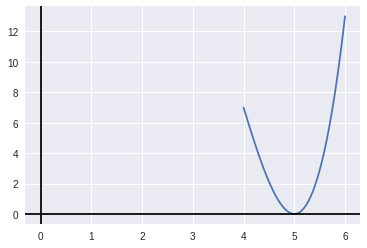

In [0]:
build_plot(Task3.function, (4, 6))

Again, we can not use bisection method here but we can approximately localize the root from the plot

In [0]:
print_root_with_params(*Optimizer.newton(10e-7, Task3.function, Task3.function_derivative, 4))

Root: x = 4.9999993827908185 with params {'iter_num': 19, 'epsilon': 1e-06, 'guess': 4}


##### Using modofied Newton's method to find multiple roots

In [0]:
for guess in np.linspace(2, 4, 10):
  roots = Optimizer.newton_multiple_roots(1e-10, 3, Task3.function, Task3.function_derivative, guess)
  roots = list(map(lambda x: x if x is not None else None, roots))
  print("For m = {} roots are {}:".format(3, roots))

For m = 3 roots are [(1.6666666666666667, {'iter_num': 5, 'epsilon': 1e-10, 'guess': 2.0, 'm': 1}), None, (4.99999997528018, {'iter_num': 29, 'epsilon': 1e-10, 'guess': 2.0, 'm': 3})]:
For m = 3 roots are [(1.6666666666666667, {'iter_num': 5, 'epsilon': 1e-10, 'guess': 2.2222222222222223, 'm': 1}), None, (5.000000043570666, {'iter_num': 35, 'epsilon': 1e-10, 'guess': 2.2222222222222223, 'm': 3})]:
For m = 3 roots are [(1.6666666666666667, {'iter_num': 6, 'epsilon': 1e-10, 'guess': 2.4444444444444446, 'm': 1}), None, (4.999999924877995, {'iter_num': 39, 'epsilon': 1e-10, 'guess': 2.4444444444444446, 'm': 3})]:
For m = 3 roots are [(1.6666666666666667, {'iter_num': 9, 'epsilon': 1e-10, 'guess': 2.6666666666666665, 'm': 1}), None, (5.000000063437742, {'iter_num': 27, 'epsilon': 1e-10, 'guess': 2.6666666666666665, 'm': 3})]:
For m = 3 roots are [(5.000000095310989, {'iter_num': 28, 'epsilon': 1e-10, 'guess': 2.888888888888889, 'm': 1}), (4.999999944568014, {'iter_num': 7, 'epsilon': 1e-10,

As we can  observe from iteratons' number:

1. $ x_1 = 5 $ has multiplicity = $ 2 $ 
2. $ x = \frac 5 3 $ has multiplicity = $1$.

However method does not converge to both roots at the same time.

#### Second part

1. Inversigate equation $ f(x) + \delta = 0, where \ \delta = 10 ^ {-8}$
2. Find root with multiplicity = 1.
3. Try complex guess if does not converge in 2.

In [0]:
Optimizer.newton_multiple_roots(1e-5, 3, Task3.function_wth_delta, Task3.function_derivative, 2)

[(1.6666666636666667, {'epsilon': 1e-05, 'guess': 2, 'iter_num': 4, 'm': 1}),
 None,
 None]

In [0]:
Optimizer.newton_multiple_roots(1e-5, 3, Task3.function_wth_delta, Task3.function_derivative, 4.5)

[None, None, None]

Method does not converge to second root. This happen because of function does not intersect $x$ axis at $x_2 = 5$ anymore.

We can still find complex roots though

In [0]:
Optimizer.newton_multiple_roots(1e-5, 3, Task3.function_wth_delta, Task3.function_derivative, 5 + 0.5j)

[((4.99999972396839+0.00010020214063797883j),
  {'epsilon': 1e-05, 'guess': (5+0.5j), 'iter_num': 13, 'm': 1}),
 None,
 None]

In [0]:
Optimizer.newton_multiple_roots(1e-5, 3, Task3.function_wth_delta, Task3.function_derivative, 5 - 0.5j)

[((4.99999972396839-0.00010020214063797883j),
  {'epsilon': 1e-05, 'guess': (5-0.5j), 'iter_num': 13, 'm': 1}),
 None,
 None]

Now we found last complex conjugate roots.

Final answer is: $ x_1 = \frac 5 3, x_2 = 5 + \theta i, x_3 =  5 - \theta i, where \ \theta \approx 10 ^ {-4}$